Cargando la base de datos de 50000 reseñas cortas de películas (limitando a 10000 palabras). Carga 25000 para entrenamiento y 25000 para pruebas

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
print('Tamaño del conjunto de entrenamiento',train_data.size)
print('Tamaño del conjunto de prueba',test_data.size)

17473536/17464789 [==============================] - 0s 0us/step
Tamaño del conjunto de entrenamiento 25000
Tamaño del conjunto de prueba 25000


Calificación de la primera reseña (0-mala, 1-buena)

In [2]:
train_labels[0]

1

Decodificando las reseñas a texto

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

1654784/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

Codificando la secuencia de números de cada reseña en una matriz ReseñaxPalabra. Esto produce una matriz dispersa de 0's y 1's

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Primera reseña codificada en 0 y 1 (ausencia o presencia de palabra)

In [5]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Dimension de la matriz dispersa de datos de entrenamiento

In [6]:
x_train.shape

(25000, 10000)

Transformar el tipo de las matrices de etiquetas

In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Definición del modelo

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(10000))
x = layers.Flatten()(inputs)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10000)]           0         
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 10,001
Trainable params: 10,001
Non-trainable params: 0
_________________________________________________________________


Parametrizar el modelo

In [9]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Definir el conjunto de validación y quedan 10000 para validacion y 15000 para entrenamiento

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Entrenar el modelo

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 47ms/step - loss: 0.6127 - accuracy: 0.7452 - val_loss: 0.5609 - val_accuracy: 0.8062
Epoch 2/10
30/30 [==============================] - 1s 28ms/step - loss: 0.5158 - accuracy: 0.8448 - val_loss: 0.4975 - val_accuracy: 0.8349
Epoch 3/10
30/30 [==============================] - 1s 20ms/step - loss: 0.4547 - accuracy: 0.8681 - val_loss: 0.4526 - val_accuracy: 0.8476
Epoch 4/10
30/30 [==============================] - 1s 23ms/step - loss: 0.4089 - accuracy: 0.8815 - val_loss: 0.4180 - val_accuracy: 0.8623
Epoch 5/10
30/30 [==============================] - 1s 27ms/step - loss: 0.3737 - accuracy: 0.8930 - val_loss: 0.3925 - val_accuracy: 0.8661
Epoch 6/10
30/30 [==============================] - 1s 28ms/step - loss: 0.3453 - accuracy: 0.9002 - val_loss: 0.3718 - val_accuracy: 0.8731
Epoch 7/10
30/30 [==============================] - 1s 26ms/step - loss: 0.3221 - accuracy: 0.9072 - val_loss: 0.3559 - val_accuracy: 0.8763
Epoch 8/10
30

Graficar la pérdida del conjunto de validación durante el entrenamiento

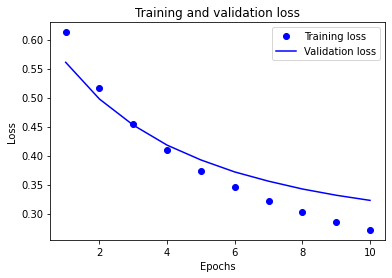

In [12]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Graficar la precisión (accuracy) del conjunto de validación durante el entrenamiento

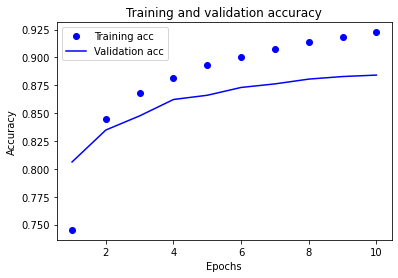

In [13]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Matriz de confusión


In [21]:
print(test_labels)

[0 1 1 ... 0 0 0]


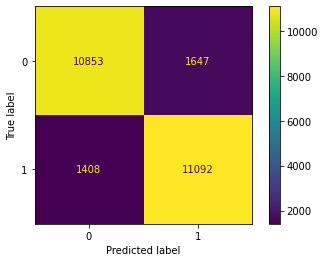

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_predictions = model.predict(x_test)
cm = confusion_matrix(test_labels, test_predictions > 0.5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Cálculo de la exactitud (en inglés, accurracy)

In [43]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, test_predictions > 0.5))

0.8778


**Ejercicio:**

Desarrollar un modelo que tenga la mejor exactitud (en inglés, accurracy) posible en el conjunto de prueba (en inglés, test). Para lograrlo, hay que hacer un entrenamiento sin sobreajustar (en inglés, overfit)